In [1]:
import numpy as np
from main.alpaca import *
from main.datagen import *
from main.dataViz import *

In [2]:
cfg_filename = 'configs/trajectory-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
class TrajectoriesDataset():
    def __init__(self, root_dir, num_input_points, num_hand_points=21, input_dim=3, shuffle=False):
        self.root_dir = root_dir
        self.num_input_points = num_input_points
        self.num_hand_points = num_hand_points
        self.input_dim = input_dim
        self.shuffle = shuffle
        self.all_filepaths = [a for (a, b, c) in os.walk(self.root_dir) if len(b) == 0]

    def __len__(self):
        return len(self.all_filepaths)

    def __getitem__(self, filepath_idx):
        traj_array = np.zeros((self.num_input_points, self.input_dim*self.num_hand_points))
        target_array = np.zeros((self.num_input_points, self.input_dim*self.num_hand_points))
        filepath = os.path.join(self.all_filepaths[filepath_idx], "skeleton.txt")

        with open(filepath) as file:
            file_contents = file.readlines()
            if len(file_contents) >= self.num_input_points + 1:
                for i in range(self.num_input_points):
                    file_line = file_contents[i].split()
                    next_file_line = file_contents[i+1].split()
                    for j in range(len(file_line) - 1):
                        traj_array[i, j] = file_line[j+1]
                        target_array[i, j] = next_file_line[j+1]

        return (target_array, traj_array)
    
    def sample_trajectories(self, num_samples):
        sample_ids = np.random.choice(self.__len__(), num_samples)
        traj_matrix = np.zeros((num_samples, self.num_input_points, self.input_dim*self.num_hand_points))
        target_matrix = np.zeros((num_samples, self.num_input_points, self.input_dim*self.num_hand_points))
        for i in range(num_samples):
            traj_matrix[i,:,:] = self.__getitem__(i)[1]
            target_matrix[i,:,:] = self.__getitem__(i)[0]
        return target_matrix, traj_matrix

In [4]:
num_input_points = config['num_input_points']
num_hand_points = config['num_hand_points']
input_dim = config['input_dim']
shuffle = config['shuffle']
train_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/', num_input_points, num_hand_points, input_dim, shuffle)
test_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/valid/', num_input_points, num_hand_points, input_dim, shuffle)

num_samples_train = 10
Y1, X1 = train_dataset.sample_trajectories(num_samples_train)
print('Y1 size', Y1.shape)
print('X1 size', X1.shape)
Y1 = Y1.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)
X1 = X1.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)
Y2, X2 = train_dataset.sample_trajectories(num_samples_train)
Y2 = Y2.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)
X2 = X2.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)

num_samples_test = 10
Y_test1, X_test1 = test_dataset.sample_trajectories(num_samples_test)
Y_test1 = Y_test1.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)
X_test1 = X_test1.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)
Y_test2, X_test2 = test_dataset.sample_trajectories(num_samples_test)
Y_test2 = Y_test2.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)
X_test2 = X_test2.reshape(num_samples_train, num_input_points*num_hand_points*input_dim, 1)

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5

Y1 size (10, 10, 63)
X1 size (10, 10, 63)


loss: 7159.591
loss: 2231.9067
loss: 270.66324
loss: 4646.322
loss: 1839.4099
loss: 573.1519
loss: 2018.6985
loss: 1638.5934
loss: 6401.1587
loss: 7358.9204
loss: 3328.944
loss: 2540.0532
loss: 1947.2048
loss: 4615.769
loss: 3496.6265
loss: 3513.786
loss: 39542.77
loss: 45835.926
loss: 27473.975
loss: 15539.653
loss: 7747.417
loss: 7732.815
loss: 5971.249
loss: 5346.2285
loss: 6438.0986
loss: 2415.4858
loss: 1738.1467
loss: 2129.9258
loss: 1333.2765
loss: 1389.4287
loss: 974.0635
loss: 1141.7706
loss: 579.2863
loss: 518.319
loss: 411.09027
loss: 490.83633
loss: 328.79407
loss: 290.5635
loss: 195.30719
loss: 381.41852
loss: 391.5897
loss: 388.28265
loss: 386.60446
loss: 1885.5886
loss: 596.7075
loss: 324.5952
loss: 461.18573
loss: 79748.3
loss: 24594.621
loss: 86014.13
loss: 9890.1455
loss: 45102.023
loss: 79528.54
loss: 72238.89
loss: 104163.55
loss: 62683.707
loss: 73808.36
loss: 63295.617
loss: 74502.805
loss: 89815.94
loss: 71021.58
loss: 81664.08
loss: 56369.414
loss: 76220.03
loss

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-pac

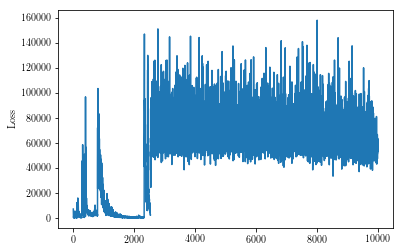

In [5]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1, g1)
agent1.train(sess1, Y1, X1, 10000, plot_loss=True)

loss: 4137.2207
loss: 2560.0142
loss: 8795.127
loss: 553.0215
loss: 1019.78534
loss: 8359.814
loss: 21238.543
loss: 19338.35
loss: 12767.045
loss: 16474.605
loss: 10007.206
loss: 12345.276
loss: 13160.867
loss: 9266.944
loss: 7715.5483
loss: 7826.1914
loss: 7191.853
loss: 6715.8623
loss: 4882.206
loss: 4736.53
loss: 5964.838
loss: 4892.6904
loss: 6357.87
loss: 1850.5374
loss: 1353.0945
loss: 2901.3657
loss: 2421.2788
loss: 4154.507
loss: 2338.6619
loss: 3362.6726
loss: 4404.06
loss: 3252.18
loss: 1650.6846
loss: 4244.986
loss: 1292.386
loss: 2411.3784
loss: 1987.8011
loss: 1304.9424
loss: 4107.3506
loss: 1704.8137


/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


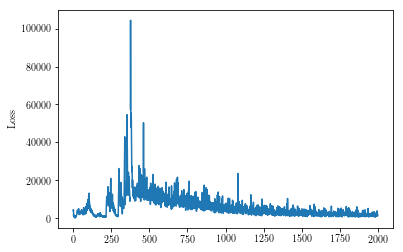

In [5]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1, g1)
agent1.train(sess1, Y1, X1, 2000, plot_loss=True)

loss: 1769.1973
loss: 43.60863
loss: 100.99102
loss: 57.45472
loss: 27.25382
loss: 49.989773
loss: 5179.7354
loss: 853.26526
loss: 385.3121
loss: 850.20935
loss: 1872.2933
loss: 1281.9877
loss: 5536.5435
loss: 24205.098
loss: 32970.406
loss: 5157.952
loss: 9896.7705
loss: 39078.098
loss: 63332.594
loss: 36286.086
loss: 5624.4385
loss: 59448.45
loss: 93956.99
loss: 5912.115
loss: 7291.499
loss: 5942.5
loss: 6042.5835
loss: 6184.4717
loss: 5498.122
loss: 5078.6123
loss: 4499.365
loss: 4582.7344
loss: 4401.6855
loss: 4370.108
loss: 3458.0508
loss: 6219.876
loss: 4691.7188
loss: 3753.1367
loss: 3507.2168
loss: 3675.4102


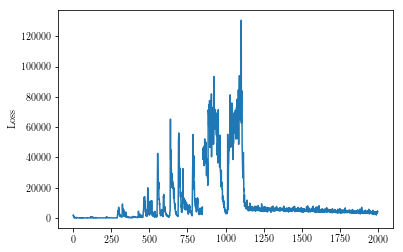

In [6]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config)
agent2.sigma_scalar = noise2
agent2.construct_model(sess2, g2)
agent2.train(sess2, Y2, X2, 2000, plot_loss=True)

In [28]:
print(Y_test1.shape)
temp_test = Y_test1[:,-63:,:]
print(temp_test.shape)
y, s = agent1.test(sess1, X_test1, Y_test1, temp_test)
print(y.shape)
print(s.shape)
print(temp_test-y)

(10, 630, 1)
(10, 63, 1)
(10, 63, 1)
(10, 63, 1, 1)
[[[-1.35287827e+01]
  [ 4.25210645e+00]
  [-3.19105182e+01]
  [ 6.06695957e+00]
  [ 1.18121170e+01]
  [-3.59167839e+01]
  [-4.36951250e+00]
  [ 6.81357227e-01]
  [-1.54827150e+01]
  [-1.71986417e+01]
  [-8.72363672e+00]
  [-1.01108060e+01]
  [-1.00415292e+01]
  [-5.33563027e+00]
  [-6.39852529e+00]
  [ 1.15524392e+01]
  [ 3.40165557e+00]
  [-5.68668252e+00]
  [-5.89193184e+00]
  [ 5.25452520e+00]
  [-1.89547762e+01]
  [ 3.48767070e+00]
  [-7.42541523e+00]
  [-5.85878242e+00]
  [ 4.46069141e+00]
  [ 2.76807617e-01]
  [ 7.76968184e+00]
  [-9.85110469e+00]
  [ 4.56256875e+00]
  [ 1.72038984e+00]
  [-2.82161016e+00]
  [ 4.46627285e+00]
  [ 1.22093422e+01]
  [ 3.73132422e+00]
  [ 6.80370313e-01]
  [ 1.32199602e+01]
  [ 1.68455879e+00]
  [ 3.86428105e+00]
  [ 1.09562039e+01]
  [-8.60968984e+00]
  [ 3.47624297e+00]
  [ 2.58932003e+01]
  [-2.74287285e+00]
  [ 4.64832305e+00]
  [ 2.94205785e+01]
  [ 1.23128926e+00]
  [-9.93903828e+00]
  [ 1.24

In [12]:
# from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d

def plot_hand_points(hand_points):
    x_coords = hand_points[::3]
    y_coords = hand_points[1::3]
    z_coords = hand_points[2::3]
    
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    hand_plot = ax.scatter(x_coords, y_coords, z_coords)
    
    def plot_finger(inds_array):
        for i in range(len(inds_array)-1):
            xs = (x_coords[inds_array[i]], x_coords[inds_array[i+1]])
            ys = (y_coords[inds_array[i]], y_coords[inds_array[i+1]])
            zs = (z_coords[inds_array[i]], z_coords[inds_array[i+1]])
            line_seg = plt3d.art3d.Line3D(xs, ys, zs)
            ax.add_line(line_seg)
        
    # Draw thumb
    thumb_inds = [0, 1, 6, 7, 8]
    plot_finger(thumb_inds)
    
    # Draw index
    index_inds = [0, 2, 9, 10, 11]
    plot_finger(index_inds)
    
    # Draw middle
    middle_inds = [0, 3, 12, 13, 14]
    plot_finger(middle_inds)
    
    # Draw ring
    ring_inds = [0, 4, 15, 16, 17]
    plot_finger(ring_inds)
    
    # Draw pinky
    pinky_inds = [0, 5, 18, 19, 20]
    plot_finger(pinky_inds)
        
#     plt.show()
    return hand_plot

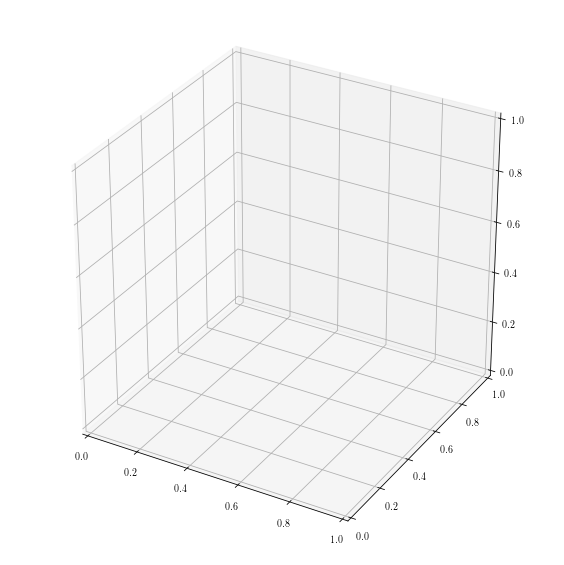

ValueError: shapes (4,4) and (4,2,1) not aligned: 4 (dim 1) != 2 (dim 1)

<Figure size 720x720 with 1 Axes>

In [13]:
import matplotlib.animation as animation

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d', aspect='equal')
    
def animate(i):
    temp_test = Y_test1[:,-63:,:]
    y, s = agent1.test(sess1, X_test1, Y_test1, temp_test)
    return plot_hand_points(y[0,:,:])
    
anim = animation.FuncAnimation(fig, animate, interval=20, repeat=False, blit=False)

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


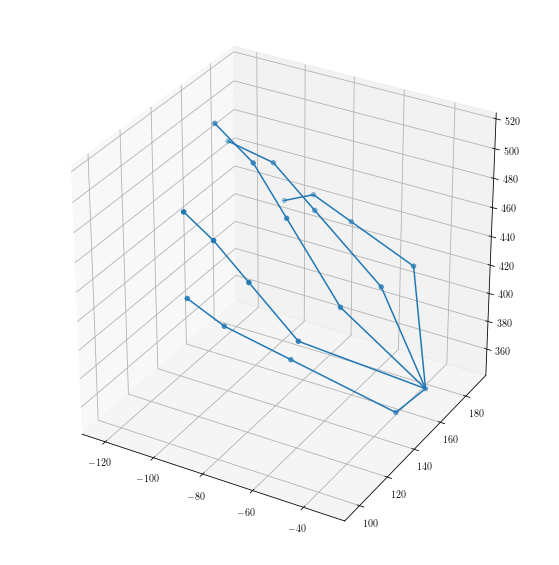

In [6]:
Y11, X11 = train_dataset.sample_trajectories(num_samples_train)
plot_hand_points(X11[0,0,:])

(10, 10, 63)
(10, 10, 63)
(21,)
(21,)


/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-pac

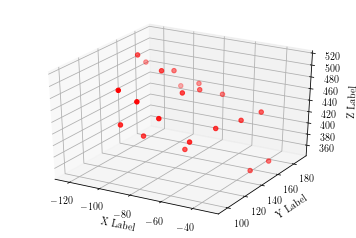

In [35]:
print(Y_test1.shape)
temp_test = Y_test1[:,-63:,:]
print(temp_test.shape)
y, s = agent1.test(sess1, X_test1, Y_test1, temp_test)
print(y.shape)
print(s.shape)
print(temp_test-y)

NameError: name 'step_mat_test' is not defined

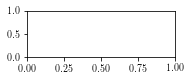

In [11]:
ind = 2
sample_size_list = [0,2,4,6,8,10,12,14,16,18,20]
plt.figure(figsize=(9,len(sample_size_list)*1))
for i,num_pts in enumerate(sample_size_list):
    X_update1 = X_test1[ind:(ind+1),:num_pts,:]
    Y_update1 = Y_test1[ind:(ind+1),:num_pts,:]
    
    X_update2 = X_test2[ind:(ind+1),:num_pts,:]
    Y_update2 = Y_test2[ind:(ind+1),:num_pts,:]
    
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True

    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_multistep_fig(agent1, sess1, X_update1, Y_update1, step_mat_test[ind,:], label=None)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.1$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_multistep_fig(agent2, sess2, X_update2, Y_update2, step_mat_test[ind,:], label=None)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.3$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
    
    ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
    gen_multistep_fig(agent3, sess3, X_update3, Y_update3, step_mat_test[ind,:], label=None)
    plt.setp(ax3.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.5$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax3.get_xticklabels(), visible=False)

plt.tight_layout(w_pad=0.0,h_pad=0.2)
plt.savefig('figures/multistep_varying_noise.pdf')
plt.show()